PROJEKAT IZ SOM
----

In [94]:
import pandas as pd
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_rows', 40)




3. Ucitavanje i obrada podataka
--------------

In [33]:
data = pd.read_csv('13_dermatology_dataset.csv')
data

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [34]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0    erythema                                  366 non-null    int64 
 1    scaling                                   366 non-null    int64 
 2    definite borders                          366 non-null    int64 
 3    itching                                   366 non-null    int64 
 4    koebner phenomenon                        366 non-null    int64 
 5    polygonal papules                         366 non-null    int64 
 6    follicular papules                        366 non-null    int64 
 7    oral mucosal involvement                  366 non-null    int64 
 8    knee and elbow involvement                366 non-null    int64 
 9    scalp involvement                         366 non-null    int64 
 10   family history                       

In [35]:
description = data.describe(include='all').T
description

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
erythema,366.0,NaN,NaN,NaN,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,NaN,NaN,NaN,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite borders,366.0,NaN,NaN,NaN,1.54918,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,NaN,NaN,NaN,1.36612,1.138299,0.0,0.0,1.0,2.0,3.0
koebner phenomenon,366.0,NaN,NaN,NaN,0.63388,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal papules,366.0,NaN,NaN,NaN,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular papules,366.0,NaN,NaN,NaN,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral mucosal involvement,366.0,NaN,NaN,NaN,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee and elbow involvement,366.0,NaN,NaN,NaN,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp involvement,366.0,NaN,NaN,NaN,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


Osam redova u tabeli nema specificirane godine. Njihovim uklanjanjem gubimo oko 2% podataka. Bez čega se mora, bez toga se može.

In [36]:
filtered_data = data
filtered_data[' Age (linear)'] = filtered_data[' Age (linear)'].replace('?', np.nan)
filtered_data[' Age (linear)'].fillna(data[' Age (linear)'].median(), inplace = True)
filtered_data[' Age (linear)'] = pd.to_numeric(filtered_data[' Age (linear)'])
filtered_data.info()
filtered_data.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0    erythema                                  366 non-null    int64  
 1    scaling                                   366 non-null    int64  
 2    definite borders                          366 non-null    int64  
 3    itching                                   366 non-null    int64  
 4    koebner phenomenon                        366 non-null    int64  
 5    polygonal papules                         366 non-null    int64  
 6    follicular papules                        366 non-null    int64  
 7    oral mucosal involvement                  366 non-null    int64  
 8    knee and elbow involvement                366 non-null    int64  
 9    scalp involvement                         366 non-null    int64  
 10   family history           

,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.0,3.0
koebner phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral mucosal involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee and elbow involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


4. Grupisanje klasa
-----------------

Preuzeto sa veb-sajta baze podataka:
    
    Class code:   Class:                  Number of instances:
    1             psoriasis			             112
    2             seboreic dermatitis             61
    3             lichen planus                   72
    4             pityriasis rosea                49
    5             cronic dermatitis               52    
    6             pityriasis rubra pilaris        20

In [37]:
diagnoses = [1, 2, 3, 4, 5, 6]
counts = []
for diagnosis in diagnoses:
    counts.append(filtered_data[filtered_data['Class'] == diagnosis].shape[0])
print(counts)


[112, 61, 72, 49, 52, 20]


Broj instanci je promenjen jer su podaci filtrirani. Ukupno fali 8 instanci, što odgovara broju uklonjenih uzoraka.

In [38]:
percents = [float(i) / np.sum(counts) for i in counts]
print(percents)

[0.30601092896174864, 0.16666666666666666, 0.19672131147540983, 0.13387978142076504, 0.14207650273224043, 0.0546448087431694]


Samo jedne klase ima ispod 10%, te nema potrebe za grupisanjem.

5. Korelacije
---------------

In [39]:
%matplotlib qt

pearson_R = filtered_data.corr(method='pearson')
plt.figure()
plt.title('Pirsonov koeficijent korelacije')
sns.heatmap(pearson_R,annot=True)
plt.show()

spearman_R = filtered_data.corr(method='spearman')
plt.figure()
plt.title('Spirmanov koeficijent korelacije')
sns.heatmap(spearman_R,annot=True)
plt.show()

IG:

In [40]:
def calculate_info_D(column):
    infoD = 0
    uni = np.unique(column)
    for u in uni:
        p = sum(column == u)/len(column)
        infoD -= p*np.log2(p)
    return infoD

class_column = filtered_data.iloc[:,-1]

infoD = calculate_info_D(class_column)

#U prvu kolonu smestamo indekse kolona iz dataseta, a u drugu odgovarajuce IG
IG=np.zeros((filtered_data.shape[1]-1,2))

#Racunanje IG
for i in range(filtered_data.shape[1]-1):
    infoDA = 0
    v = np.unique(filtered_data.iloc[:,i])
    
    for j in v:
        tmp = class_column[filtered_data.iloc[:,i] == j]
        
        infoDj = calculate_info_D(tmp)
        Dj = sum(filtered_data.iloc[:,i] == j)
        D = len(filtered_data.iloc[:,i])
        
        infoDA += Dj/D*infoDj
    
    IG[i,0] = i
    IG[i,1] = infoD - infoDA
   
IG = IG[np.argsort(-IG[:,1])] # sortiranje u opadajucem poretku po IG

print('-------------')
print(IG[:,1])
print('-------------')
print(IG[:,0])

-------------
[0.86312691 0.79413097 0.78854623 0.72153712 0.70175235 0.68621762
 0.68527157 0.66806925 0.66488784 0.64921762 0.62026316 0.6151494
 0.60460005 0.59024356 0.57456212 0.49817435 0.45793813 0.44999615
 0.40406524 0.37413366 0.35963993 0.31100854 0.30381091 0.30070591
 0.29383678 0.28092259 0.26998503 0.26232633 0.15878702 0.14085912
 0.13205422 0.12737847 0.09593742 0.09328063]
-------------
[20. 19. 21. 33. 32. 28. 26. 11. 24.  5. 15.  7. 27.  8. 14.  9. 23. 13.
  4. 25.  2. 18. 30.  6.  3. 22.  1. 29. 10.  0. 17. 16. 12. 31.]


6. LDA redukcija
--------------

LDA je nepodesna za kategoričke promenljive.

In [41]:
#Normalizacija atributa

X = filtered_data.iloc[:,:-1] # atributi
y = filtered_data.iloc[:,-1] # kolona klasa

X_norm = X - np.mean(X, axis = 0)
X_norm = X_norm/np.max(X_norm,axis = 0)

lda = LDA(solver = 'eigen', n_components = 3)
lda_comp = lda.fit_transform(X_norm,y)
lda_comp = pd.DataFrame(data = lda_comp)

lda_data = pd.concat([lda_comp,y],axis = 1)
lda_data.columns = ['LDA1','LDA2','LDA3', 'outcome']

In [42]:
#podaci
x = lda_data['LDA1']
y = lda_data['LDA2']
z = lda_data['LDA3']
C = lda_data['outcome']
D = lda_data[['LDA1', 'LDA2', 'LDA3']]

In [43]:
plt.figure()
sns.pointplot(data = lda_data, x = 'LDA1', y = 'LDA2', hue = 'outcome')
plt.show()

# axes
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# colormap
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=C, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

7. Test više hipoteza
----------------------

Klasa za testiranje više hipoteza:

In [44]:
class MultipleHypothesis:

    def __init__(self):
        self.ms = []
        self.ss = []
        self.ps = []
        self.clss = []

    # Računa parametre za estimaciju FGV, pri čemu je pretpostavljena
    # multimodalna normalna raspodela. Postoji i bibliotečka f-ja koja
    # radi s estimacijom pomoću kernela, ali nisam uspeo da je nateram da radi.
    def train(self, training_data, training_classes):
        uniques = np.unique(training_classes)
        n = training_data.shape[0]
        for u in uniques:
            xs = training_data[training_classes==u].values
            self.ms.append(np.mean(xs, axis=0))     # mean
            self.ss.append(np.cov(xs.T))            # cov mat
            self.ps.append(float(xs.shape[0]) / n)  # Pi

    # Računa FGV za konkretne parametre, pretpostavljajući normalnu raspodelu.
    def estimate_vector_pdf(self, x, m, s):
        det = np.linalg.det(s)
        inv = np.linalg.inv(s)
        x_mu = x-m
        
        fgv_const = 1/np.sqrt(2*np.pi*det)
        fgv_rest = np.exp(-0.5*x_mu.T @ inv @ x_mu)
        return fgv_const * fgv_rest

    # Sračunava klase za test-skup.
    def test(self, test_data, test_classes):
        for i in range(test_data.shape[0]):
            fs = [self.ps[j]*self.estimate_vector_pdf(test_data.iloc[i], self.ms[j], self.ss[j]) for j in range(len(np.unique(test_classes)))]
            self.clss.append(np.argmax(fs) + 1)
        return self.clss
    
    # Računa procenat greške na test-skupu.
    def evaluate(self,test_classes):
        ercount = 0
        for i in range(len(self.clss)):
            if self.clss[i] != test_classes.iloc[i]: # RUŽNO!!! Treba da oba budu isti tip, ne ovako
                ercount += 1
        return float(ercount)/len(self.clss)


Test više hipoteza:

In [45]:
D_train, D_test, C_train, C_test = train_test_split(D, C, train_size=0.7, random_state=42)

# Test više hipoteza
mh = MultipleHypothesis()
mh.train(D_train,C_train)
C_approx = mh.test(D_test, C_test)

print(mh.evaluate(C_test))

0.12727272727272726


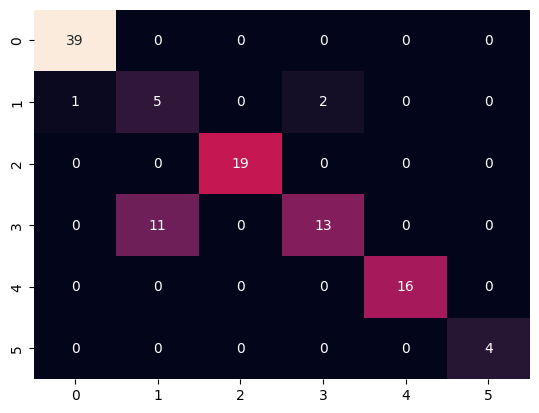

In [95]:
conf_mat = confusion_matrix(C_approx, C_test)
sns.heatmap(conf_mat,annot=True, fmt='g', cbar=False)
plt.show()

In [46]:
# axes
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# colormap
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(D_test['LDA1'], D_test['LDA2'], D_test['LDA3'], s=40, c=C_approx, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('Klasifikovani')
plt.show()

# axes
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# colormap
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=C, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('Originalni')
plt.show()

8. Neuralna mreža
---------------

Potrebno je binarizovati podatke, da bi izlaz bio kompatibilan sa implementacijom neuralne mreže. Nakon toga, podaci se dele na trening i test skup.

In [98]:
from sklearn.preprocessing import LabelBinarizer

mlb = LabelBinarizer()
C_nn = mlb.fit_transform(C)

X_train, X_test, Y_train, Y_test = train_test_split(D, C_nn, train_size=0.8, random_state=42)

Zatim gradimo i treniramo model.

Model sa jednim skrivenim slojem:

Tačnost na trening skupu iznosi: 88.35616707801819%.
Tačnost na test skupu iznosi: 93.24324131011963%.


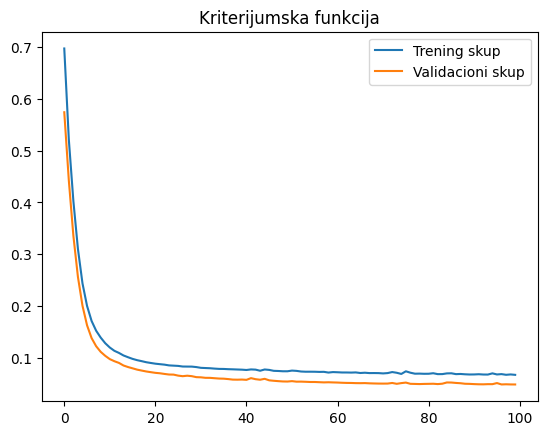

3/3 [==============================] - 0s 999us/step


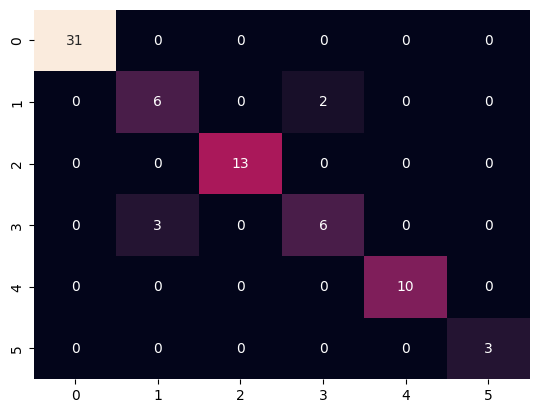

In [105]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(C_nn.shape[1], activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=0)

_, train_acc = model.evaluate(X_train,Y_train,verbose=0)
print('Tačnost na trening skupu iznosi: '+str(train_acc*100)+'%.')

_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Tačnost na test skupu iznosi: '+str(test_acc*100)+'%.')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Trening skup","Validacioni skup"])
plt.title('Kriterijumska funkcija')
plt.show()

Y_predict = mlb.inverse_transform(model.predict(X_test))
conf_mat = confusion_matrix(Y_predict, mlb.inverse_transform(Y_test))
sns.heatmap(conf_mat,annot=True, fmt='g', cbar=False)
plt.show()

Testiramo i različite brojeve neurona u skrivenom sloju:

Broj neurona:  2
Tačnost na trening skupu iznosi: 47.94520437717438%.
Tačnost na test skupu iznosi: 59.45945978164673%.


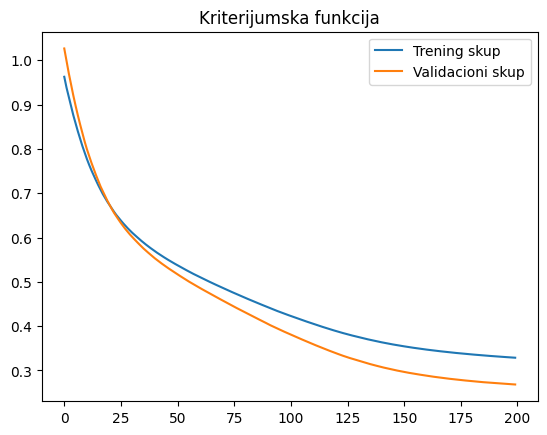

Broj neurona:  50
Tačnost na trening skupu iznosi: 89.72602486610413%.
Tačnost na test skupu iznosi: 93.24324131011963%.


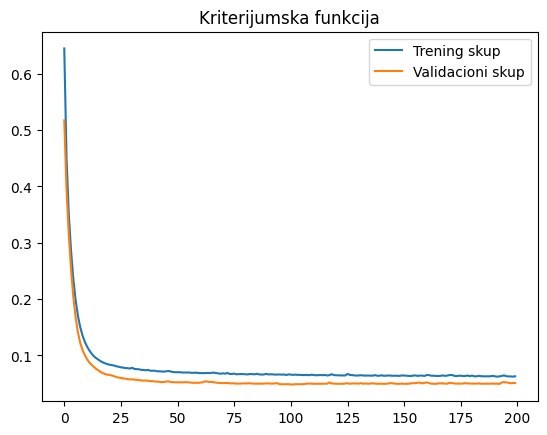

Broj neurona:  100
Tačnost na trening skupu iznosi: 90.06849527359009%.
Tačnost na test skupu iznosi: 93.24324131011963%.


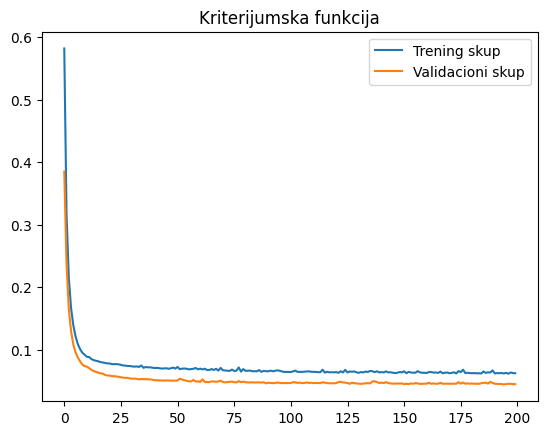

Broj neurona:  300
Tačnost na trening skupu iznosi: 90.41095972061157%.
Tačnost na test skupu iznosi: 91.89189076423645%.


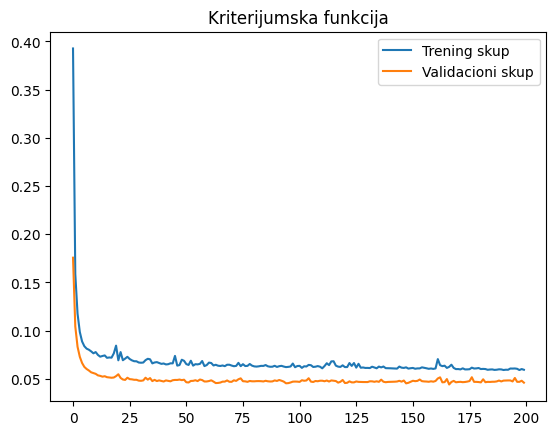

Broj neurona:  500
Tačnost na trening skupu iznosi: 91.4383590221405%.
Tačnost na test skupu iznosi: 91.89189076423645%.


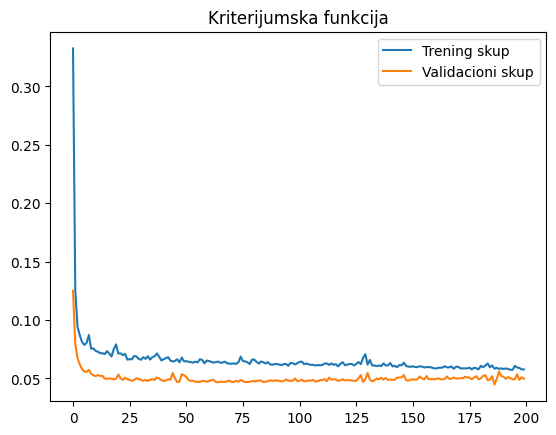

Broj neurona:  1000
Tačnost na trening skupu iznosi: 90.06849527359009%.
Tačnost na test skupu iznosi: 89.18918967247009%.


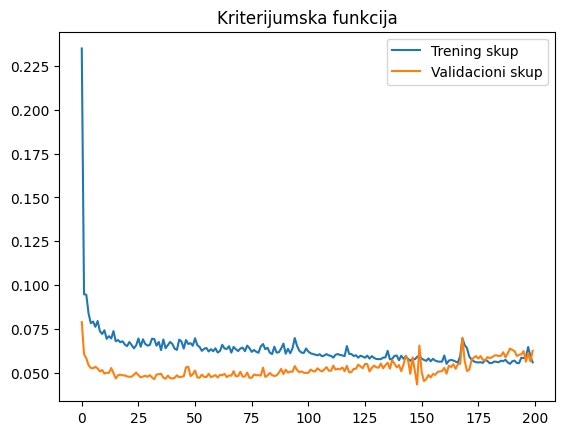

Broj neurona:  3000
Tačnost na trening skupu iznosi: 89.72602486610413%.
Tačnost na test skupu iznosi: 87.83783912658691%.


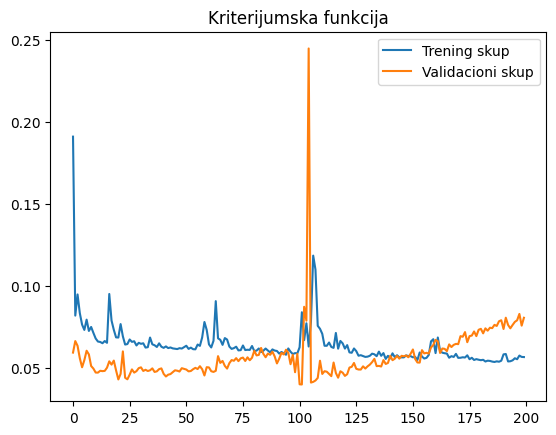

In [86]:
%matplotlib inline

X_train, X_test, Y_train, Y_test = train_test_split(D, C_nn, train_size=0.8, random_state=42)

train_accs = []
test_accs = []

for n_hid_neurons in [2, 50, 100, 300, 500, 1000, 3000]:
    model = Sequential()
    model.add(Dense(n_hid_neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_hid_neurons, activation='relu'))
    model.add(Dense(C_nn.shape[1], activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, verbose=0)

    print('Broj neurona: ', n_hid_neurons)

    _, train_acc=model.evaluate(X_train,Y_train,verbose=0)
    print('Tačnost na trening skupu iznosi: '+ str(train_acc*100) + '%.')

    _, test_acc=model.evaluate(X_test, Y_test, verbose=0)
    print('Tačnost na test skupu iznosi: '+str(test_acc*100)+'%.')

    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(["Trening skup","Validacioni skup"])
    plt.title('Kriterijumska funkcija')
    plt.show()

    Y_predict = mlb.inverse_transform(model.predict(X_test))
    conf_mat = confusion_matrix(Y_predict, mlb.inverse_transform(Y_test))
    sns.heatmap(conf_mat,annot=True, fmt='g', cbar=False)
    plt.show()

    train_accs.append(train_acc)
    test_accs.append(test_acc)

Koristeći više skrivenih slojeva:

Tačnost na trening skupu iznosi: 89.38356041908264%.
Tačnost na test skupu iznosi: 93.24324131011963%.


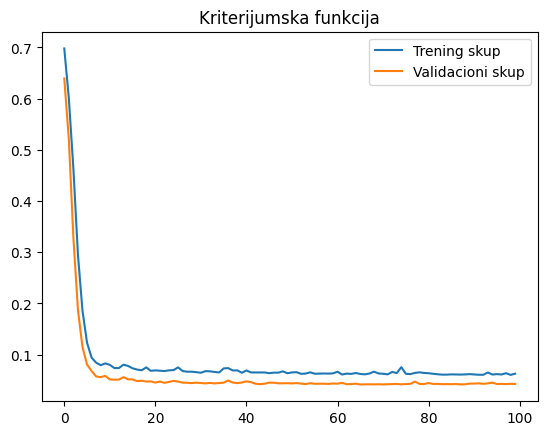

3/3 [==============================] - 0s 1ms/step


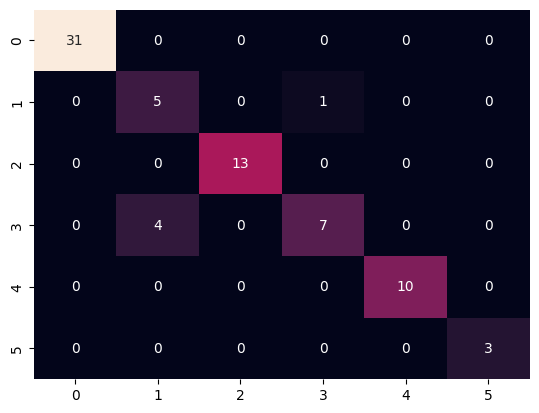

In [106]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(C_nn.shape[1], activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=0)

_, train_acc=model.evaluate(X_train,Y_train,verbose=0)
print('Tačnost na trening skupu iznosi: '+str(train_acc*100)+'%.')

_, test_acc=model.evaluate(X_test, Y_test, verbose=0)
print('Tačnost na test skupu iznosi: '+str(test_acc*100)+'%.')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Trening skup","Validacioni skup"])
plt.title('Kriterijumska funkcija')
plt.show()

Y_predict = mlb.inverse_transform(model.predict(X_test))
conf_mat = confusion_matrix(Y_predict, mlb.inverse_transform(Y_test))
sns.heatmap(conf_mat,annot=True, fmt='g', cbar=False)
plt.show()

Rano zaustavljanje:

Epoch 141: early stopping
Tačnost na trening skupu iznosi: 90.41095972061157%.
Tačnost na test skupu iznosi: 91.89189076423645%.


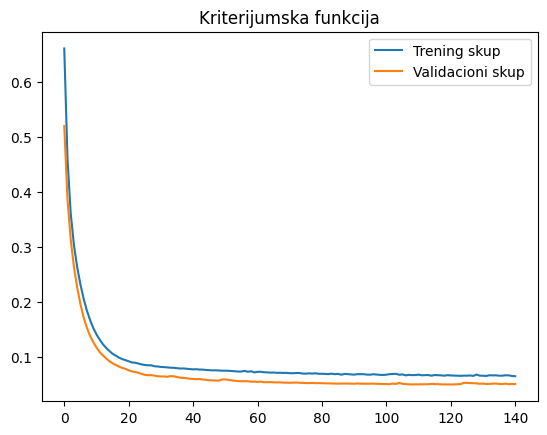

3/3 [==============================] - 0s 1ms/step


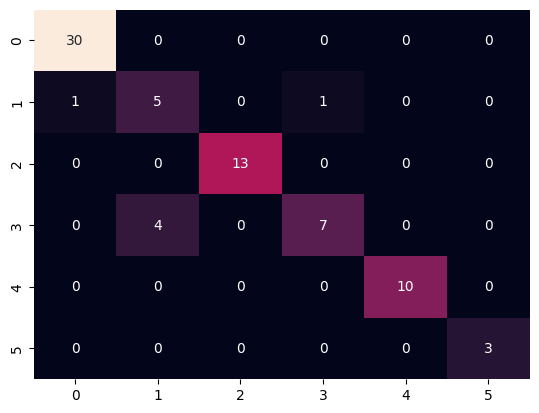

In [107]:
model = Sequential()

model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(C_nn.shape[1], activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

history=model.fit(X_train, Y_train,
                  epochs=1000, validation_data=(X_test, Y_test),
                  callbacks=[es], verbose=0)

_,train_acc=model.evaluate(X_train,Y_train,verbose=0)
print('Tačnost na trening skupu iznosi: '+str(train_acc*100)+'%.')

_,test_acc=model.evaluate(X_test,Y_test,verbose=0)
print('Tačnost na test skupu iznosi: '+str(test_acc*100)+'%.')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Trening skup","Validacioni skup"])
plt.title('Kriterijumska funkcija')
plt.show()

Y_predict = mlb.inverse_transform(model.predict(X_test))
conf_mat = confusion_matrix(Y_predict, mlb.inverse_transform(Y_test))
sns.heatmap(conf_mat,annot=True, fmt='g', cbar=False)
plt.show()

Regularizacija:

Tačnost na trening skupu iznosi: 84.24657583236694%.
Tačnost na test skupu iznosi: 89.18918967247009%.


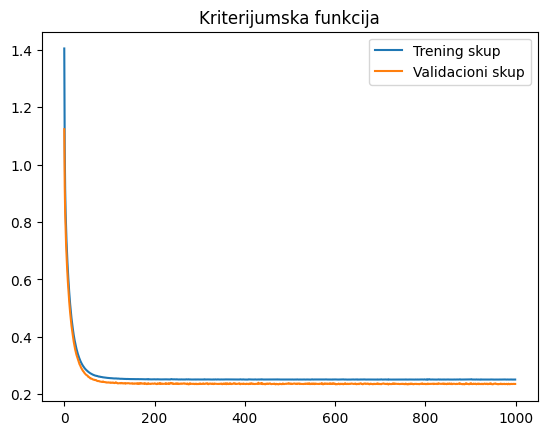

3/3 [==============================] - 0s 1ms/step


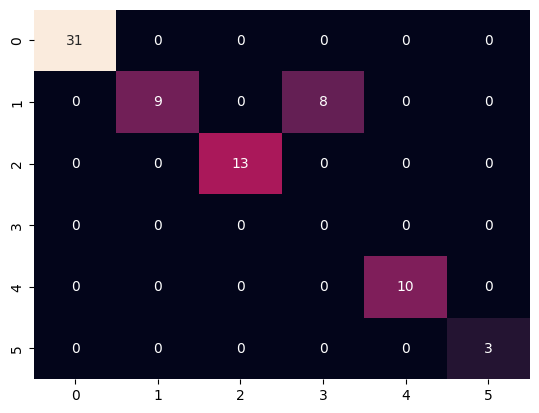

In [108]:
from keras.regularizers import l2
rl = l2(0.01)

model = Sequential()

model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(C_nn.shape[1], activation='sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, Y_train,
                  epochs = 1000, validation_data=(X_test, Y_test),
                  verbose=0)

_,train_acc=model.evaluate(X_train,Y_train,verbose=0)
print('Tačnost na trening skupu iznosi: ' + str(train_acc*100)+'%.')

_,test_acc=model.evaluate(X_test,Y_test,verbose=0)
print('Tačnost na test skupu iznosi: ' + str(test_acc*100)+'%.')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Trening skup","Validacioni skup"])
plt.title('Kriterijumska funkcija')
plt.show()

Y_predict = mlb.inverse_transform(model.predict(X_test))
conf_mat = confusion_matrix(Y_predict, mlb.inverse_transform(Y_test))
sns.heatmap(conf_mat,annot=True, fmt='g', cbar=False)
plt.show()